### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_status=application_df["STATUS"].value_counts()
application_status

1    34294
0        5
Name: STATUS, dtype: int64

In [3]:
application_spcons=application_df["SPECIAL_CONSIDERATIONS"].value_counts()
application_spcons

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(columns=["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"], inplace=True)

In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

<AxesSubplot:>

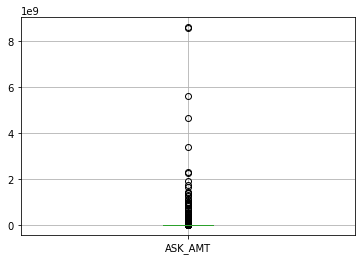

In [6]:
application_df.boxplot(column="ASK_AMT")

In [7]:
application_df["ASK_AMT"].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [8]:
application_df.drop(index=application_df[application_df["ASK_AMT"]>6000000000].index.to_list(), axis=0, inplace=True)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,5000,1


In [9]:
data_crosstab = pd.crosstab(application_df['CLASSIFICATION'],
                            application_df['IS_SUCCESSFUL'], 
                               margins = False)
data_crosstab.head()

IS_SUCCESSFUL,0,1
CLASSIFICATION,,
C0,1,2
C1000,7566,9759
C1200,2599,2238
C1230,6,30
C1234,0,2


In [10]:
application_incamt=application_df["INCOME_AMT"].value_counts()
application_incamt

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               137
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

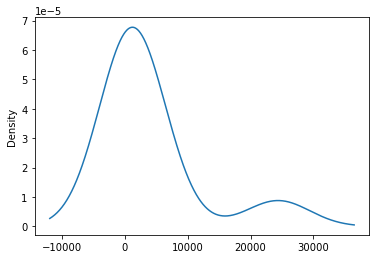

In [11]:
application_incamt.plot.density()

In [12]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_type=application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27035
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

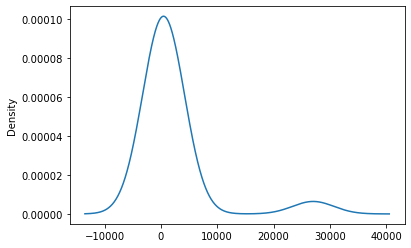

In [13]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_type.plot.density()

In [14]:
# Determine which values to replace if counts are less than 500?
#  YOUR CODE GOES HERE
replace_application = application_type[application_type < 500].index
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27035
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_class=application_df["CLASSIFICATION"].value_counts()
application_class.head()

C1000    17325
C2000     6073
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

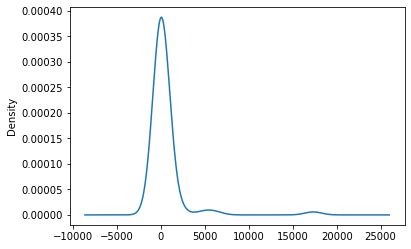

In [16]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
application_class.plot.density()

In [17]:
# Determine which values to replace if counts are less than 700?
#  YOUR CODE GOES HERE
replace_class = application_class[application_class < 700].index
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17325
C2000     6073
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [18]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y=application_df["IS_SUCCESSFUL"].values
X=application_df.drop(columns="IS_SUCCESSFUL").values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 20
hidden_nodes_layer4 = 10



nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))


# Fourth hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))



# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))



# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               5040      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4840      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 10,921
Trainable params: 10,921
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("ATTEMPT1_checkpoints/",exist_ok=True)
checkpoint_path = "ATTEMPT1_checkpoints/weights.{epoch:02d}.hdf5"
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    #steps_per_execution=5,
    #save_freq=5
    period=5
)

In [25]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 4s 3ms/step - loss: 0.5706 - accuracy: 0.7192
Epoch 2/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5581 - accuracy: 0.7263
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5557 - accuracy: 0.7270
Epoch 4/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5538 - accuracy: 0.7288
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5523 - accuracy: 0.7313

Epoch 00005: saving model to ATTEMPT1_checkpoints/weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5508 - accuracy: 0.7295
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5507 - accuracy: 0.7315
Epoch 8/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5494 - accuracy: 0.7312
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5494 - accuracy: 0.7311
Epoch 10/100
804/804 [==

804/804 [==============================] - 6s 8ms/step - loss: 0.5373 - accuracy: 0.7378: 0s - loss: 0.5

Epoch 00070: saving model to ATTEMPT1_checkpoints/weights.70.hdf5
Epoch 71/100
804/804 [==============================] - 12s 15ms/step - loss: 0.5368 - accuracy: 0.7380
Epoch 72/100
804/804 [==============================] - 11s 14ms/step - loss: 0.5366 - accuracy: 0.7380
Epoch 73/100
804/804 [==============================] - 7s 8ms/step - loss: 0.5371 - accuracy: 0.7376: 0s - loss: 0.5373 - 
Epoch 74/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5374 - accuracy: 0.7380
Epoch 75/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5367 - accuracy: 0.7380

Epoch 00075: saving model to ATTEMPT1_checkpoints/weights.75.hdf5
Epoch 76/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5363 - accuracy: 0.7381: 0s - loss: 0.5
Epoch 77/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5364 - accuracy: 0.7385
Epoch

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 0.5834 - accuracy: 0.7216
Loss: 0.5834474563598633, Accuracy: 0.7216001749038696


In [28]:
# Export our model to HDF5 file
nn.save("ATTEMPT1_AlphabetSoupCharity_Optimization.h5")